In [1]:
import json

with open("PT_train_lens.json", encoding="utf-8") as f:
        train_lens = json.load(f)

with open("PT_test_lens.json", encoding="utf-8") as f:
        test_lens = json.load(f)

with open("PT_val_lens.json", encoding="utf-8") as f:
        val_lens = json.load(f)
        
total_lens = val_lens + test_lens + train_lens

In [2]:
val_lens[:10]

[{'file': 'PMC6046428_table_1.json', 'len': 318},
 {'file': 'PMC3089176_table_1.json', 'len': 146},
 {'file': 'PMC6091158_table_0.json', 'len': 209},
 {'file': 'PMC5890098_table_0.json', 'len': 329},
 {'file': 'PMC4411689_table_0.json', 'len': 224},
 {'file': 'PMC3051629_table_4.json', 'len': 182},
 {'file': 'PMC4369334_table_0.json', 'len': 212},
 {'file': 'PMC3379230_table_3.json', 'len': 84},
 {'file': 'PMC6035167_table_0.json', 'len': 884},
 {'file': 'PMC3136437_table_0.json', 'len': 686}]

# Análise Da Distribuição dos Dados

In [3]:
limit = 777

In [4]:
lens = [item['len'] for item in total_lens]
lens = sorted(lens)

In [12]:
import numpy as np

muX = np.average(lens)
sigX  = np.std(lens)

mu = np.log(muX**2/np.sqrt(muX**2+sigX**2))
sigma = np.sqrt(np.log(1+muX**2/sigX**2))

print(mu)
print(sigma)
print(np.median(lens))
print(np.std(lens))
print((max(lens) + min(lens))/2)
print(max(lens))
print(min(lens))

n_allowed = 0
while(lens[n_allowed] < limit):
    n_allowed += 1

print(n_allowed/len(lens))

5.6962843632453675
0.9839830892132707
286.0
295.8396393091385
1635.0
3260
10
0.9545260763030765


(array([[3.69857296e-04, 1.89008085e-03, 2.59055960e-03, 2.36235268e-03,
         1.84648114e-03, 1.51593762e-03, 1.28689299e-03, 1.05969911e-03,
         8.81442895e-04, 7.43844681e-04, 6.30832189e-04, 5.39249405e-04,
         4.62647936e-04, 3.88656995e-04, 3.23724977e-04, 2.72936567e-04,
         2.24096312e-04, 1.87295657e-04, 4.54309831e-05, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000

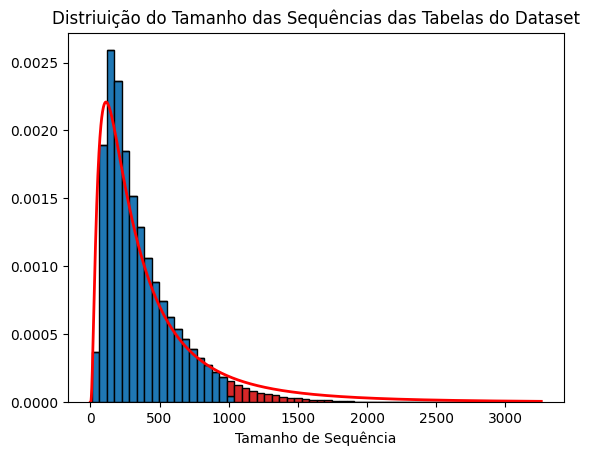

In [6]:
import matplotlib.pyplot as plt
from scipy.stats import lognorm

x = np.array([1*i for i in range(1, max(lens))])

allowed_lens = lens[:n_allowed]
nallowed_lens = lens[n_allowed:]

pdf = pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))/(x * sigma * np.sqrt(2 * np.pi)))


plt.title("Distriuição do Tamanho das Sequências das Tabelas do Dataset")

plt.xlabel("Tamanho de Sequência")

plt.plot(x, pdf, linewidth=2, color='r')

plt.hist([allowed_lens, nallowed_lens], bins = 60, color = ['tab:blue', 'tab:red'], edgecolor='black', density = True, stacked = True)

(array([3.38288727e-03, 2.97627543e-03, 2.56473497e-03, 2.23143648e-03,
        1.94311172e-03, 1.67511755e-03, 1.51493713e-03, 1.29930964e-03,
        1.14837040e-03, 1.04918176e-03, 8.56349172e-04, 7.42990720e-04,
        6.68445217e-04, 6.06221284e-04, 4.95943225e-04, 4.50353413e-04,
        3.88745559e-04, 3.40691433e-04, 3.16664370e-04, 2.72306715e-04,
        2.15011411e-04, 1.98377290e-04, 1.65725128e-04, 1.45394536e-04,
        1.10278059e-04, 1.20135315e-04, 9.61082524e-05, 8.25545245e-05,
        7.88580532e-05, 5.85274614e-05, 5.29827545e-05, 4.62058906e-05,
        4.18933408e-05, 3.01878485e-05, 3.20360841e-05, 2.15627489e-05,
        2.15627489e-05, 1.97145133e-05, 1.41698064e-05, 1.29376494e-05,
        8.62509957e-06, 6.77686395e-06, 8.62509957e-06, 8.00902103e-06,
        4.92862833e-06, 3.08039270e-06, 4.92862833e-06, 2.46431416e-06,
        2.46431416e-06, 1.84823562e-06, 1.84823562e-06, 6.16078541e-07,
        0.00000000e+00, 1.84823562e-06, 1.84823562e-06, 6.160785

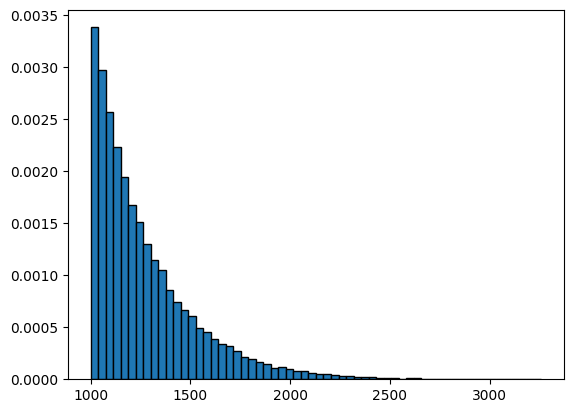

In [14]:
plt.hist(nallowed_lens, bins = 60, color = 'tab:blue', edgecolor='black', density = True, stacked = True)

# Análise Do Uso de Memória

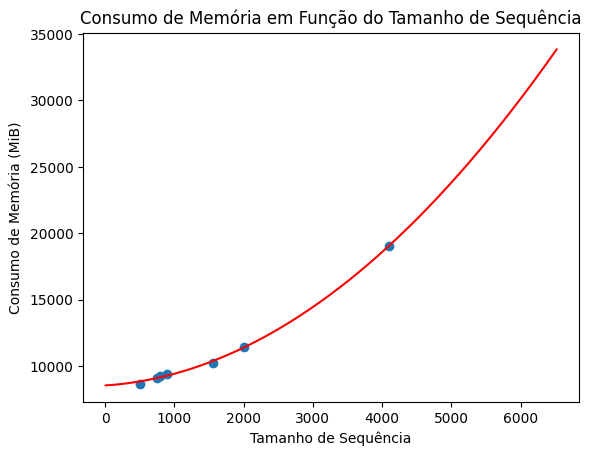

In [7]:
mem_cons = [(512,   8686),
            (750,   9128),
            (800,   9266),
            (900,   9438),
            (1563, 10246),
            (2000, 11416),
            (4096, 19044)
           ]

import numpy as np

seq_size = [item[0] for item in mem_cons]
mem = [item[1] for item in mem_cons]

model = np.poly1d(np.polyfit(seq_size, mem, 2))

#add fitted polynomial line to scatterplot
polyline = np.linspace(min(lens), max(lens)*2, 1000)
plt.scatter(seq_size, mem)
plt.plot(polyline, model(polyline), color = 'red')


plt.title("Consumo de Memória em Função do Tamanho de Sequência")

plt.ylabel("Consumo de Memória (MiB)")
plt.xlabel("Tamanho de Sequência")

plt.show()

In [8]:
np.polynomial.polynomial.Polynomial.fit(seq_size, mem, 2, full= True)

(Polynomial([12202.16315476,  5090.77246292,  1745.49959028], domain=[ 512., 4096.], window=[-1.,  1.]),
 [array([87930.02275298]),
  3,
  array([1.51033714, 0.77024584, 0.35440523]),
  1.5543122344752192e-15])

In [9]:
model(5000)

23811.83460425329